Linear Regression - Admission data 

Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from scipy.stats import shapiro,kstest,normaltest
import pickle

2.Problem Statement

To predict admission chances

3.Data Gathering 

In [6]:
df=pd.read_csv("Admission_Predict.csv")
df.drop("Serial No.",axis=1,inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [77]:
df["Research"].value_counts()

Research
1    280
0    220
Name: count, dtype: int64

In [8]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [15]:
df=df.rename(columns={"GRE Score":"GRE_Score"})

In [17]:
df=df.rename(columns={"TOEFL Score":"TOEFL_Score","University Rating":"University_Rating"})

In [18]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

4.Exploratory Data Analysis(EDA)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [20]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [21]:
df.var()

GRE_Score            127.580377
TOEFL_Score           36.989114
University_Rating      1.307619
SOP                    0.982088
LOR                    0.856457
CGPA                   0.365799
Research               0.246894
Chance of Admit        0.019921
dtype: float64

5.Assumption(Linearity)

In [22]:
df.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

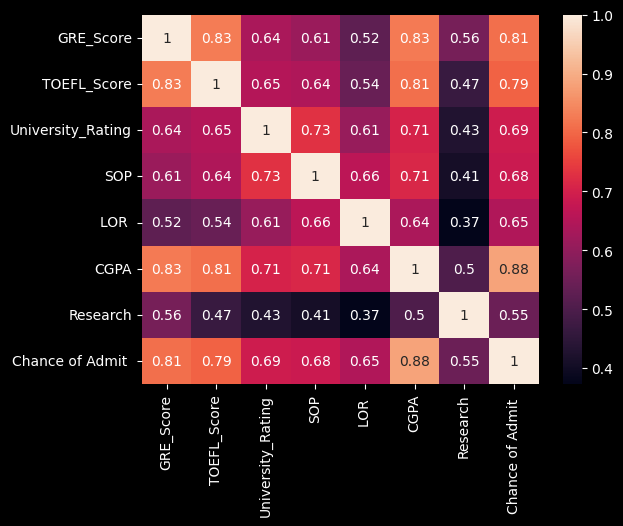

In [23]:
sns.heatmap(df.corr(),annot=True)

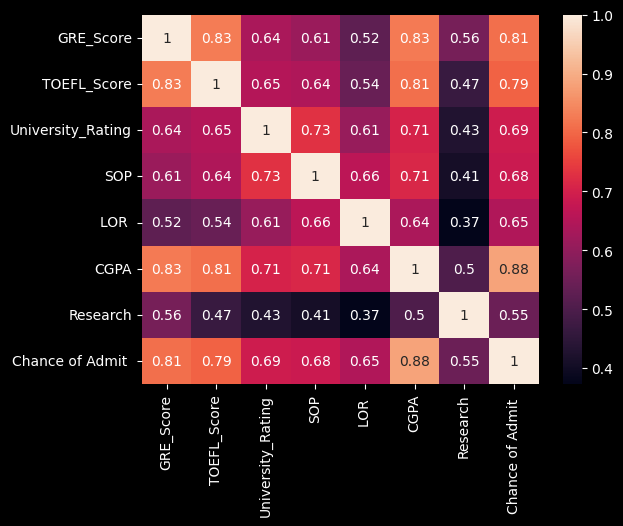

In [24]:
sns.heatmap(df.corr(),annot=True)
plt.savefig("Admission Corr.png")

In [25]:
Corelation = df.corr().tail(1)
Corelation

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.0


<Axes: >

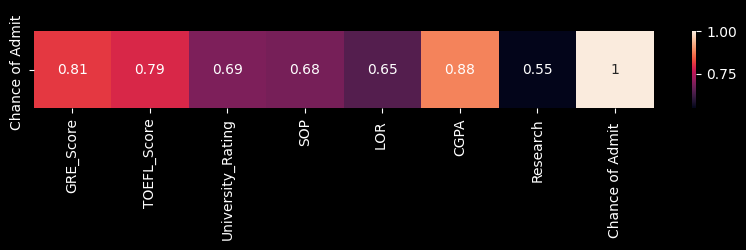

In [26]:
plt.figure(figsize=(10,1))
sns.heatmap(Corelation,annot=True)

6.Assumption(No multi co linearity)

In [27]:
df.shape[1]

8

In [28]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [29]:
df.to_numpy()

array([[337.  , 118.  ,   4.  , ...,   9.65,   1.  ,   0.92],
       [324.  , 107.  ,   4.  , ...,   8.87,   1.  ,   0.76],
       [316.  , 104.  ,   3.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [330.  , 120.  ,   5.  , ...,   9.56,   1.  ,   0.93],
       [312.  , 103.  ,   4.  , ...,   8.43,   0.  ,   0.73],
       [327.  , 113.  ,   4.  , ...,   9.04,   0.  ,   0.84]])

In [30]:
vif_list=[]
for i in range(df.shape[1]-1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    print(f"Vif of {df.columns[i]} is :",vif)
    vif_list.append(vif)

Vif of GRE_Score is : 1504.894809819234
Vif of TOEFL_Score is : 1243.5023702219323
Vif of University_Rating is : 21.590945361773844
Vif of SOP is : 35.444504213092884
Vif of LOR  is : 31.73387111365384
Vif of CGPA is : 1238.0957552630935
Vif of Research is : 3.251299796949151


In [31]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [32]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [33]:
x=df.drop("Chance of Admit ",axis=1)
x.columns


Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [34]:
s1=pd.Series(vif_list,index=x.columns)
s1

GRE_Score            1504.894810
TOEFL_Score          1243.502370
University_Rating      21.590945
SOP                    35.444504
LOR                    31.733871
CGPA                 1238.095755
Research                3.251300
dtype: float64

In [35]:
s1.sort_values()

Research                3.251300
University_Rating      21.590945
LOR                    31.733871
SOP                    35.444504
CGPA                 1238.095755
TOEFL_Score          1243.502370
GRE_Score            1504.894810
dtype: float64

<Axes: >

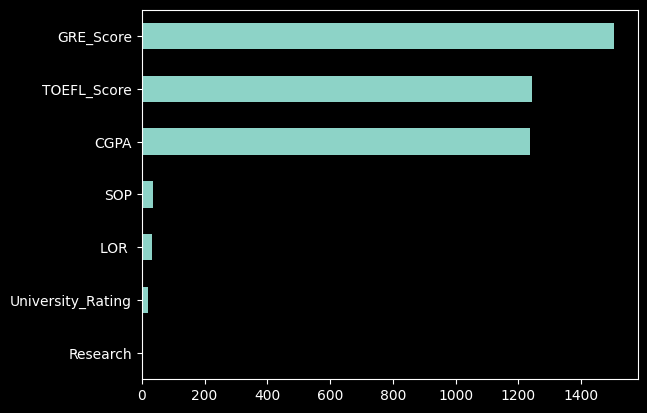

In [36]:
s1.sort_values().plot(kind="barh")

Check for outliers

<Axes: xlabel='CGPA'>

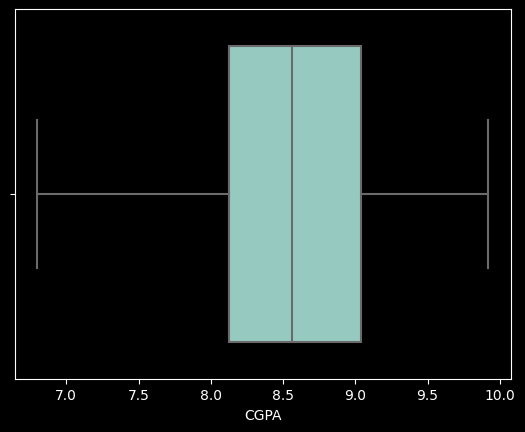

In [37]:
sns.boxplot(x=df["CGPA"])

<Axes: xlabel='GRE_Score'>

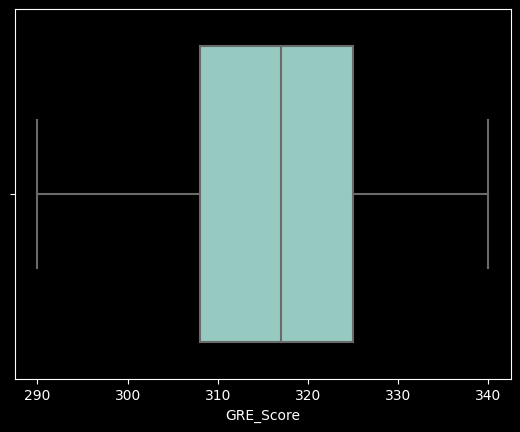

In [38]:
sns.boxplot(x=df["GRE_Score"])

<Axes: xlabel='LOR '>

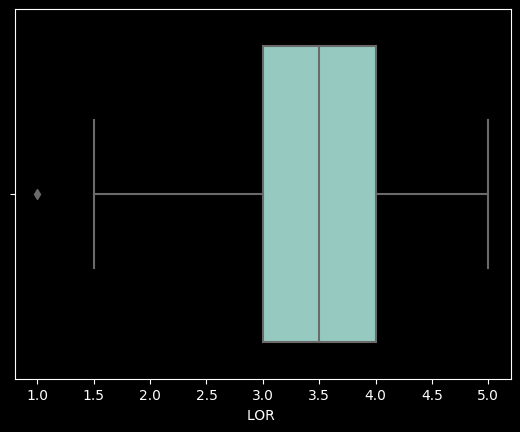

In [39]:
sns.boxplot(x=df["LOR "])

<Axes: xlabel='Research'>

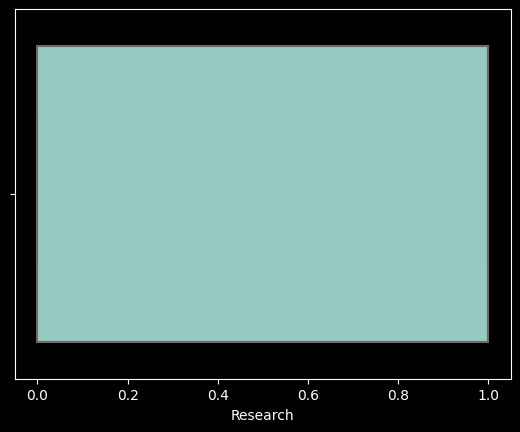

In [40]:
sns.boxplot(x=df["Research"])

<Axes: xlabel='SOP'>

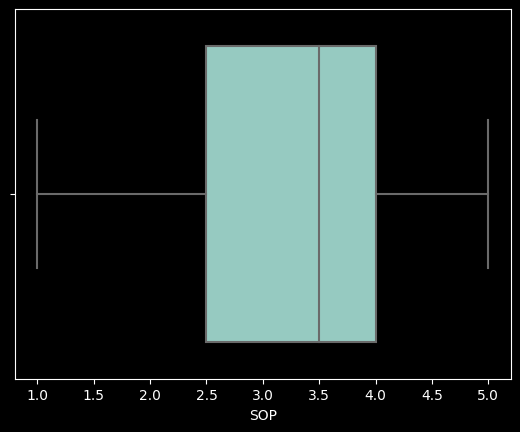

In [41]:
sns.boxplot(x=df["SOP"])

<Axes: xlabel='TOEFL_Score'>

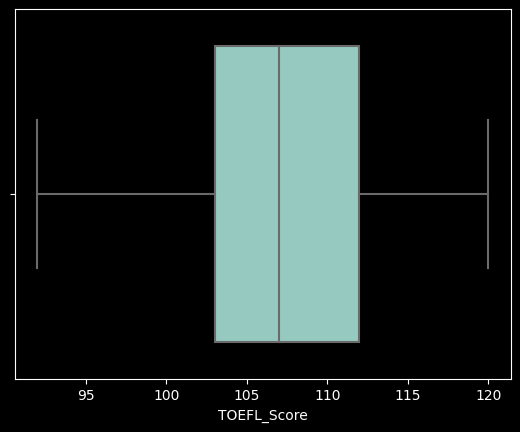

In [42]:
sns.boxplot(x=df["TOEFL_Score"])

<Axes: xlabel='University_Rating'>

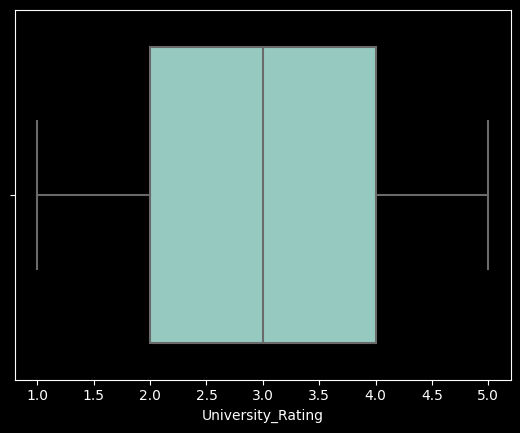

In [43]:
sns.boxplot(x=df["University_Rating"])

7.Model Training

In [44]:
x

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [45]:
y=df["Chance of Admit "]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [47]:
x_train

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
211,328,110,4,5.0,4.0,9.14,1
84,340,115,5,4.5,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0
118,296,99,2,3.0,3.5,7.28,0
126,323,113,3,4.0,3.0,9.32,1
...,...,...,...,...,...,...,...
401,315,105,2,3.0,3.0,8.34,0
343,305,103,2,2.5,3.5,8.13,0
192,322,114,5,4.5,4.0,8.94,1
387,307,105,2,2.0,3.5,8.10,0


In [45]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
421,321,112,3,3.0,4.5,8.95,1
105,316,110,3,4.0,4.5,8.78,1
222,324,113,4,4.5,4.0,8.79,0
119,327,104,5,3.0,3.5,8.84,1
347,299,94,1,1.0,1.0,7.34,0
...,...,...,...,...,...,...,...
266,312,105,2,2.0,2.5,8.45,0
413,317,101,3,3.0,2.0,7.94,1
100,322,107,3,3.5,3.5,8.46,1
82,320,110,5,5.0,4.5,9.22,1


8.Instantiating linear model

In [48]:
model = LinearRegression()
model

LinearRegression()

In [49]:
model.fit(x_train, y_train)

LinearRegression()

In [50]:
model.coef_

array([0.00191545, 0.00206582, 0.00826021, 0.00345165, 0.01698169,
       0.12289678, 0.02317254])

In [51]:
model.intercept_

-1.2712520583884908

Model Evaluation of Training data

In [52]:
y_predict_training=model.predict(x_train)
y_predict_training[:10]

array([0.84893088, 0.93536861, 0.72296986, 0.48123732, 0.83897894,
       0.76738521, 0.80775152, 0.87746806, 0.6167287 , 0.5023743 ])

In [53]:
y_train[:10]

211    0.82
84     0.94
398    0.67
118    0.47
126    0.85
76     0.74
104    0.74
445    0.91
59     0.42
57     0.46
Name: Chance of Admit , dtype: float64

In [54]:
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
print("*"*80)
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
print("*"*80)
r_squared=r2_score(y_train,y_predict_training)
print("R2 score is :",r_squared)

Mean squared error: 0.0037102431829497667
********************************************************************************
Root mean squared error: 0.06091176555436369
********************************************************************************
Mean absolute error: 0.04316036822536693
********************************************************************************
R2 score is : 0.8207523447498908


Model Evaluation of Testing data 

In [55]:
y_predict_testing=model.predict(x_test)
y_predict_testing[:10]

array([0.80963131, 0.77848161, 0.77955429, 0.79061754, 0.42641064,
       0.61574333, 0.96775952, 0.91377816, 0.91815264, 0.74076646])

In [56]:
y_test[:10]

421    0.77
105    0.69
222    0.76
119    0.71
347    0.42
352    0.64
130    0.96
187    0.93
32     0.91
3      0.80
Name: Chance of Admit , dtype: float64

In [57]:
mse=mean_squared_error(y_test,y_predict_testing)
print("Mean Squared Error:",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print("*"*80)
mae=mean_absolute_error(y_test,y_predict_testing)
print("Mean Absolute Error:",mae)
print("*"*80)
r_squared=r2_score(y_test,y_predict_testing)
print("R2 score is :",r_squared)

Mean Squared Error: 0.0029704253658626913
********************************************************************************
Root Mean Squared Error: 0.05450160883737921
********************************************************************************
Mean Absolute Error: 0.043109702028313185
********************************************************************************
R2 score is : 0.8174673275904596


11.Testing our Model

In [58]:
row_5=x_train.iloc[5]
row_5

GRE_Score            327.00
TOEFL_Score          112.00
University_Rating      3.00
SOP                    3.00
LOR                    3.00
CGPA                   8.72
Research               1.00
Name: 76, dtype: float64

12.Assumption(Normality of residual)

In [59]:
residual=y_train-y_predict_training
residual

211   -0.028931
84     0.004631
398   -0.052970
118   -0.011237
126    0.011021
         ...   
401    0.008194
343   -0.019476
192    0.032344
387   -0.082026
418   -0.029866
Name: Chance of Admit , Length: 400, dtype: float64

Kdeplot

<Axes: xlabel='Chance of Admit ', ylabel='Density'>

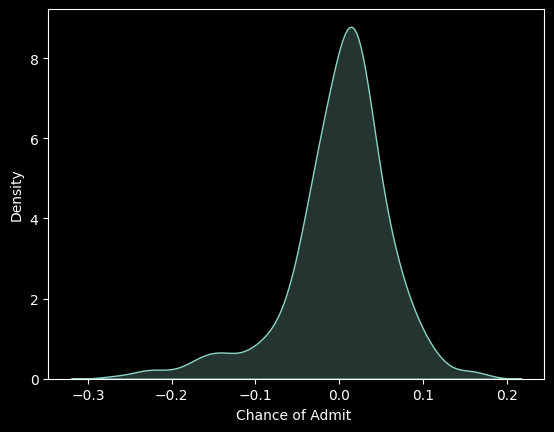

In [60]:
sns.kdeplot(residual,fill=True)

Histplot

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

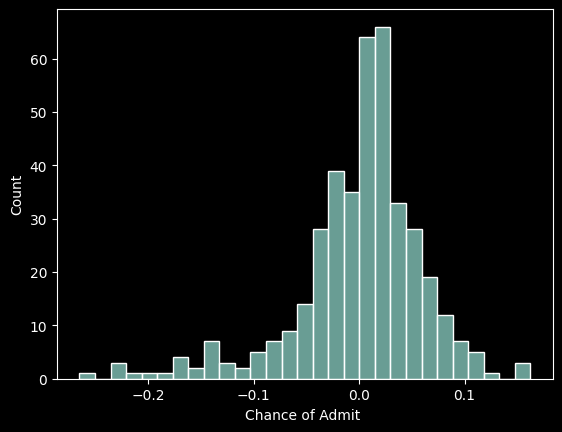

In [61]:
sns.histplot(residual)

Both Kde plot and histplot

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

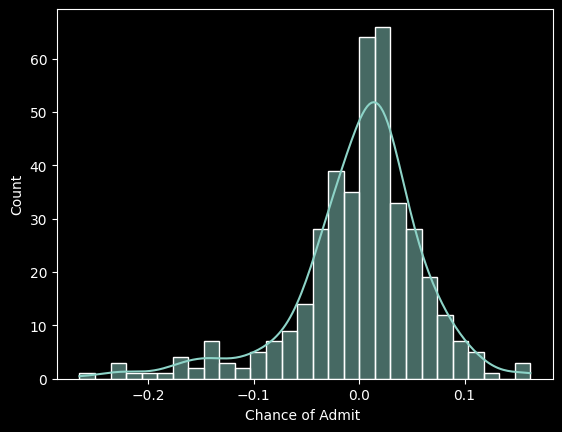

In [62]:
sns.histplot(residual,kde=True,fill=True)

QQ plot 

In [63]:
import statsmodels.api as sm

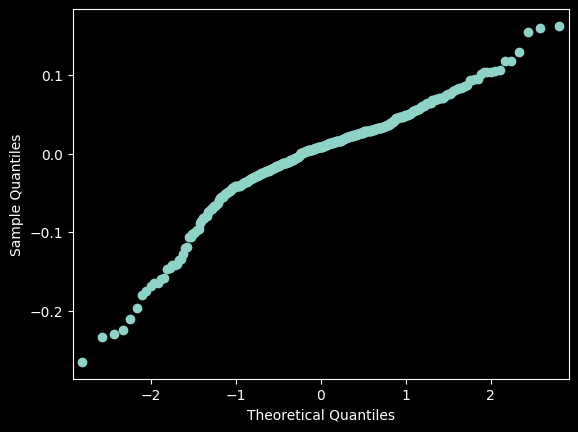

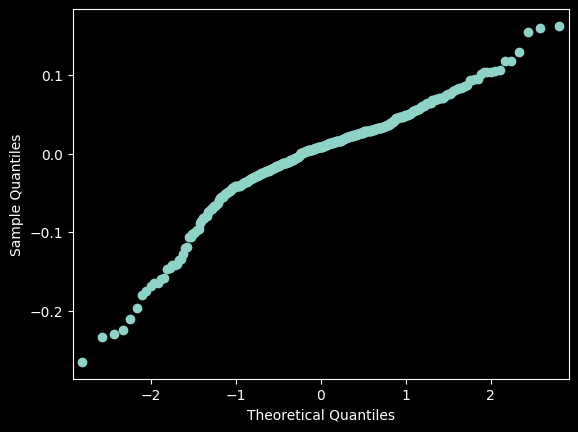

In [64]:
sm.qqplot(residual)

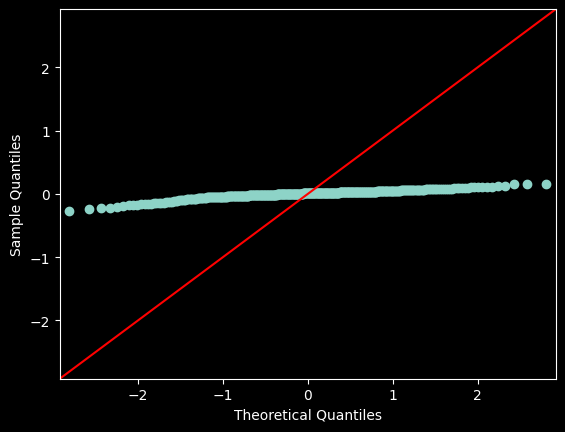

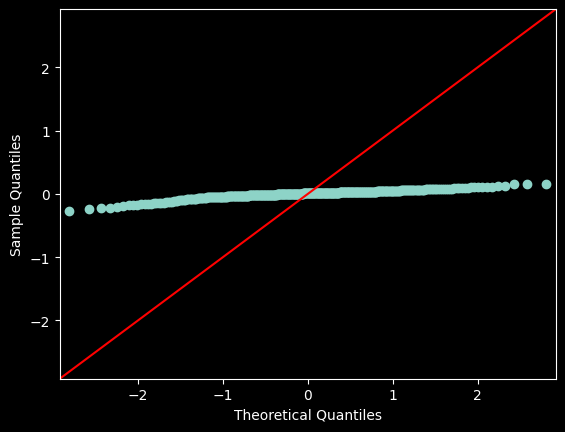

In [65]:
sm.qqplot(residual,line="45")

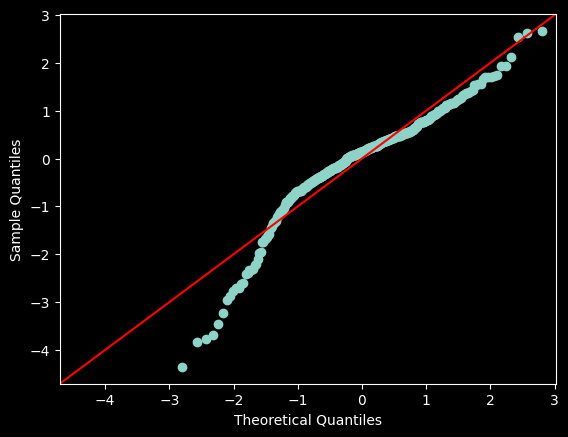

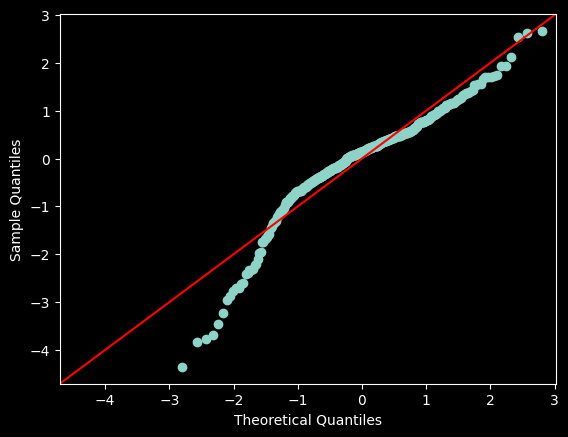

In [66]:
sm.qqplot(residual,line="45",fit=True)

Skewness of residual

In [67]:
residual.skew()

-1.1324913214984236

Hypothesis Testing

Shapiro

In [68]:
from scipy.stats import shapiro

In [69]:
stats,p_val=shapiro(residual)
print("P value is :",p_val)
if p_val>0.05:
    print("Data is Normally Distributed")
    print("Null Hypothesis is True")

else:
    print("Data is not normally distributed")
    print("Null Hypothesis is False")
    print("Alternate Hypothesis is True")

P value is : 1.8608096834238363e-13
Data is not normally distributed
Null Hypothesis is False
Alternate Hypothesis is True


Kstest

In [70]:
from scipy.stats import kstest

In [71]:
stats,p_val=kstest(residual,"norm")
print("Pvalue is : ",p_val)
if p_val>0.05:
    print("Data is Normally Distributed")
    print("Null Hypothesis is True")
else:
    print("Data is not normally distributed")
    print("Null Hypothesis is False")
    print("Alternate Hypothesis is True")

Pvalue is :  4.959172300426837e-72
Data is not normally distributed
Null Hypothesis is False
Alternate Hypothesis is True


Normal Test

In [72]:
from scipy.stats import normaltest

In [73]:
stats,p_val=normaltest(residual)
print("P value is :",p_val)
if p_val>0.05:
    print("Data is Normally Distributed")
    print("Null Hypothesis is True")
else:
    print("Data is not normally distributed")
    print("null hypothesis is False")
    print("Alternate hypothesis is True")

P value is : 2.130150250451629e-20
Data is not normally distributed
null hypothesis is False
Alternate hypothesis is True


13.HomoSkedasticity

<Axes: xlabel='Chance of Admit ', ylabel='Chance of Admit '>

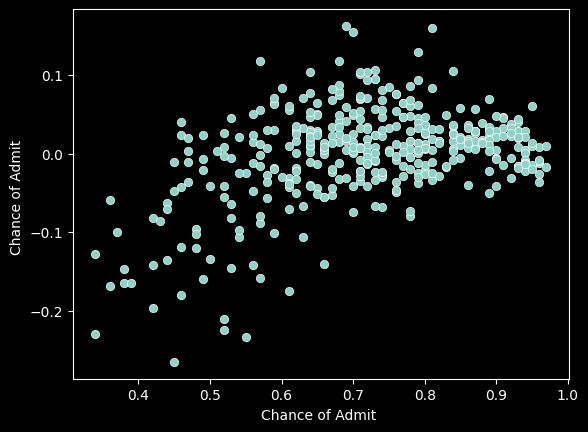

In [74]:
sns.scatterplot(x=y_train,y=residual)

In [75]:
import pickle
with open("Admission model.pkl","wb") as f:
    pickle.dump(model,f)

In [76]:
x.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')